In [4]:
import pandas as pd
import matplotlib.pyplot as plt

 ### Plot data


In this notebook we present the main plot of the paper, with the dataset associated:

In [2]:
data = pd.read_pickle("./data_multimarket.pickle")

In [26]:
data.keys()

dict_keys(['base1comp', 'base5comp', 'base7comp', 'TS_a5b5_G04', 'TS_a1b1_G085', 'TS_a1b1_G04', 'TS_a5b5_G85', 'CL_DR_noexp', 'CL_DR_exp', 'CL_FL_noexp', 'CL_FL_exp', 'greedy01', 'CL_noexp_001', 'CL_noexp_005', 'CL_exp', 'CL_EWC_noexp_05', 'CL_EWC_noexp_1', 'CL_EWC_noexp_10', 'CL_EWC_exp_1', 'puros_random', 'bloques_random', 'optimal'])

In [27]:
#Some parameters of the experiments:

strategies = {
    "base1comp": {"name": "Single-policy (1 comp)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "blue", "linestyle": "-"},
    "base5comp": {"name": "Single-policy (5 comp)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "lightblue", "linestyle": "--"},
    "base7comp": {"name": "Single-policy (7 comp)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "lightblue", "linestyle": "-."},
    "TS_a5b5_G04": {"name": "POWdTS-α5β5-γ0.4", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "red", "linestyle": "dotted"},
    "TS_a1b1_G085": {"name": "POWdTS-α1β1-γ0.85", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "red", "linestyle": "-"},
    "TS_a1b1_G04": {"name": "POWdTS-α1β1-γ0.4", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "red", "linestyle": "--"},
    "TS_a5b5_G85": {"name": "POWdTS-α5β5-γ0.85", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "red", "linestyle": "-."},
    "CL_DR_noexp": {"name": "CL-Rehearsal", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "orange", "linestyle": "-"},
    "CL_DR_exp": {"name": "CL-Rehearsal (Exp)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 80, "color": "orange", "linestyle": "--"},
    "CL_FL_noexp": {"name": "CL-FreezingL", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "gold", "linestyle": "-."},
    "CL_FL_exp": {"name": "CL-FreezingL (Exp)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 80, "color": "gold", "linestyle": "--"},
    "greedy01": {"name": "Single-policy(BASELINE)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "blue", "linestyle": "-"},
    "CL_noexp_001": {"name": "CL-SingleP (lr0.1)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "green", "linestyle": "--"},
    "CL_noexp_005": {"name": "CL-SingleP (lr0.05)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "green", "linestyle": "-."},
    "CL_exp": {"name": "CL-SingleP (lr0.1) (Exp)", "exp": "multimarket_finet_additionalqls_f30_e100_rb100", "rounds": [1, 2, 3, 4, 5], "max_rounds": 80, "color": "green", "linestyle": ":"},
    "CL_EWC_noexp_05": {"name": "CL-EWC-λ0.5", "rounds": [1, 2, 4, 5, 6], "max_rounds": 50, "color": "purple", "linestyle": ":"},
    "CL_EWC_noexp_1": {"name": "CL-EWC-λ1", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "purple", "linestyle": "-"},
    "CL_EWC_noexp_10": {"name": "CL-EWC-λ10", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "purple", "linestyle": "--"},
    "CL_EWC_exp_1": {"name": "CL-EWC-λ1 (Exp)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 80, "color": "purple", "linestyle": "dotted"},
    "puros_random": {"name": "Random Agents (timesteps)", "rounds": [1, 2, 3], "max_rounds": 50, "color": "gray", "linestyle": "-."},
    "bloques_random": {"name": "Random Agents (blocks)", "rounds": [1, 2, 3], "max_rounds": 50, "color": "gray", "linestyle": ":"},
    "optimal": {"name": "Optimal-MP (BENCHMARK)", "rounds": [1, 2, 3, 4, 5], "max_rounds": 50, "color": "black", "linestyle": "solid"}
}


subcaptions = ["#compets: 0 ",
               "#compets: 5 ",
               "#compets: 1 ",
               "#compets: 7 ",
               "#compets: 1 ",
               "#compets: 7 ",
               "#compets: 5 ",
               "#compets: 0 "]


plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 14

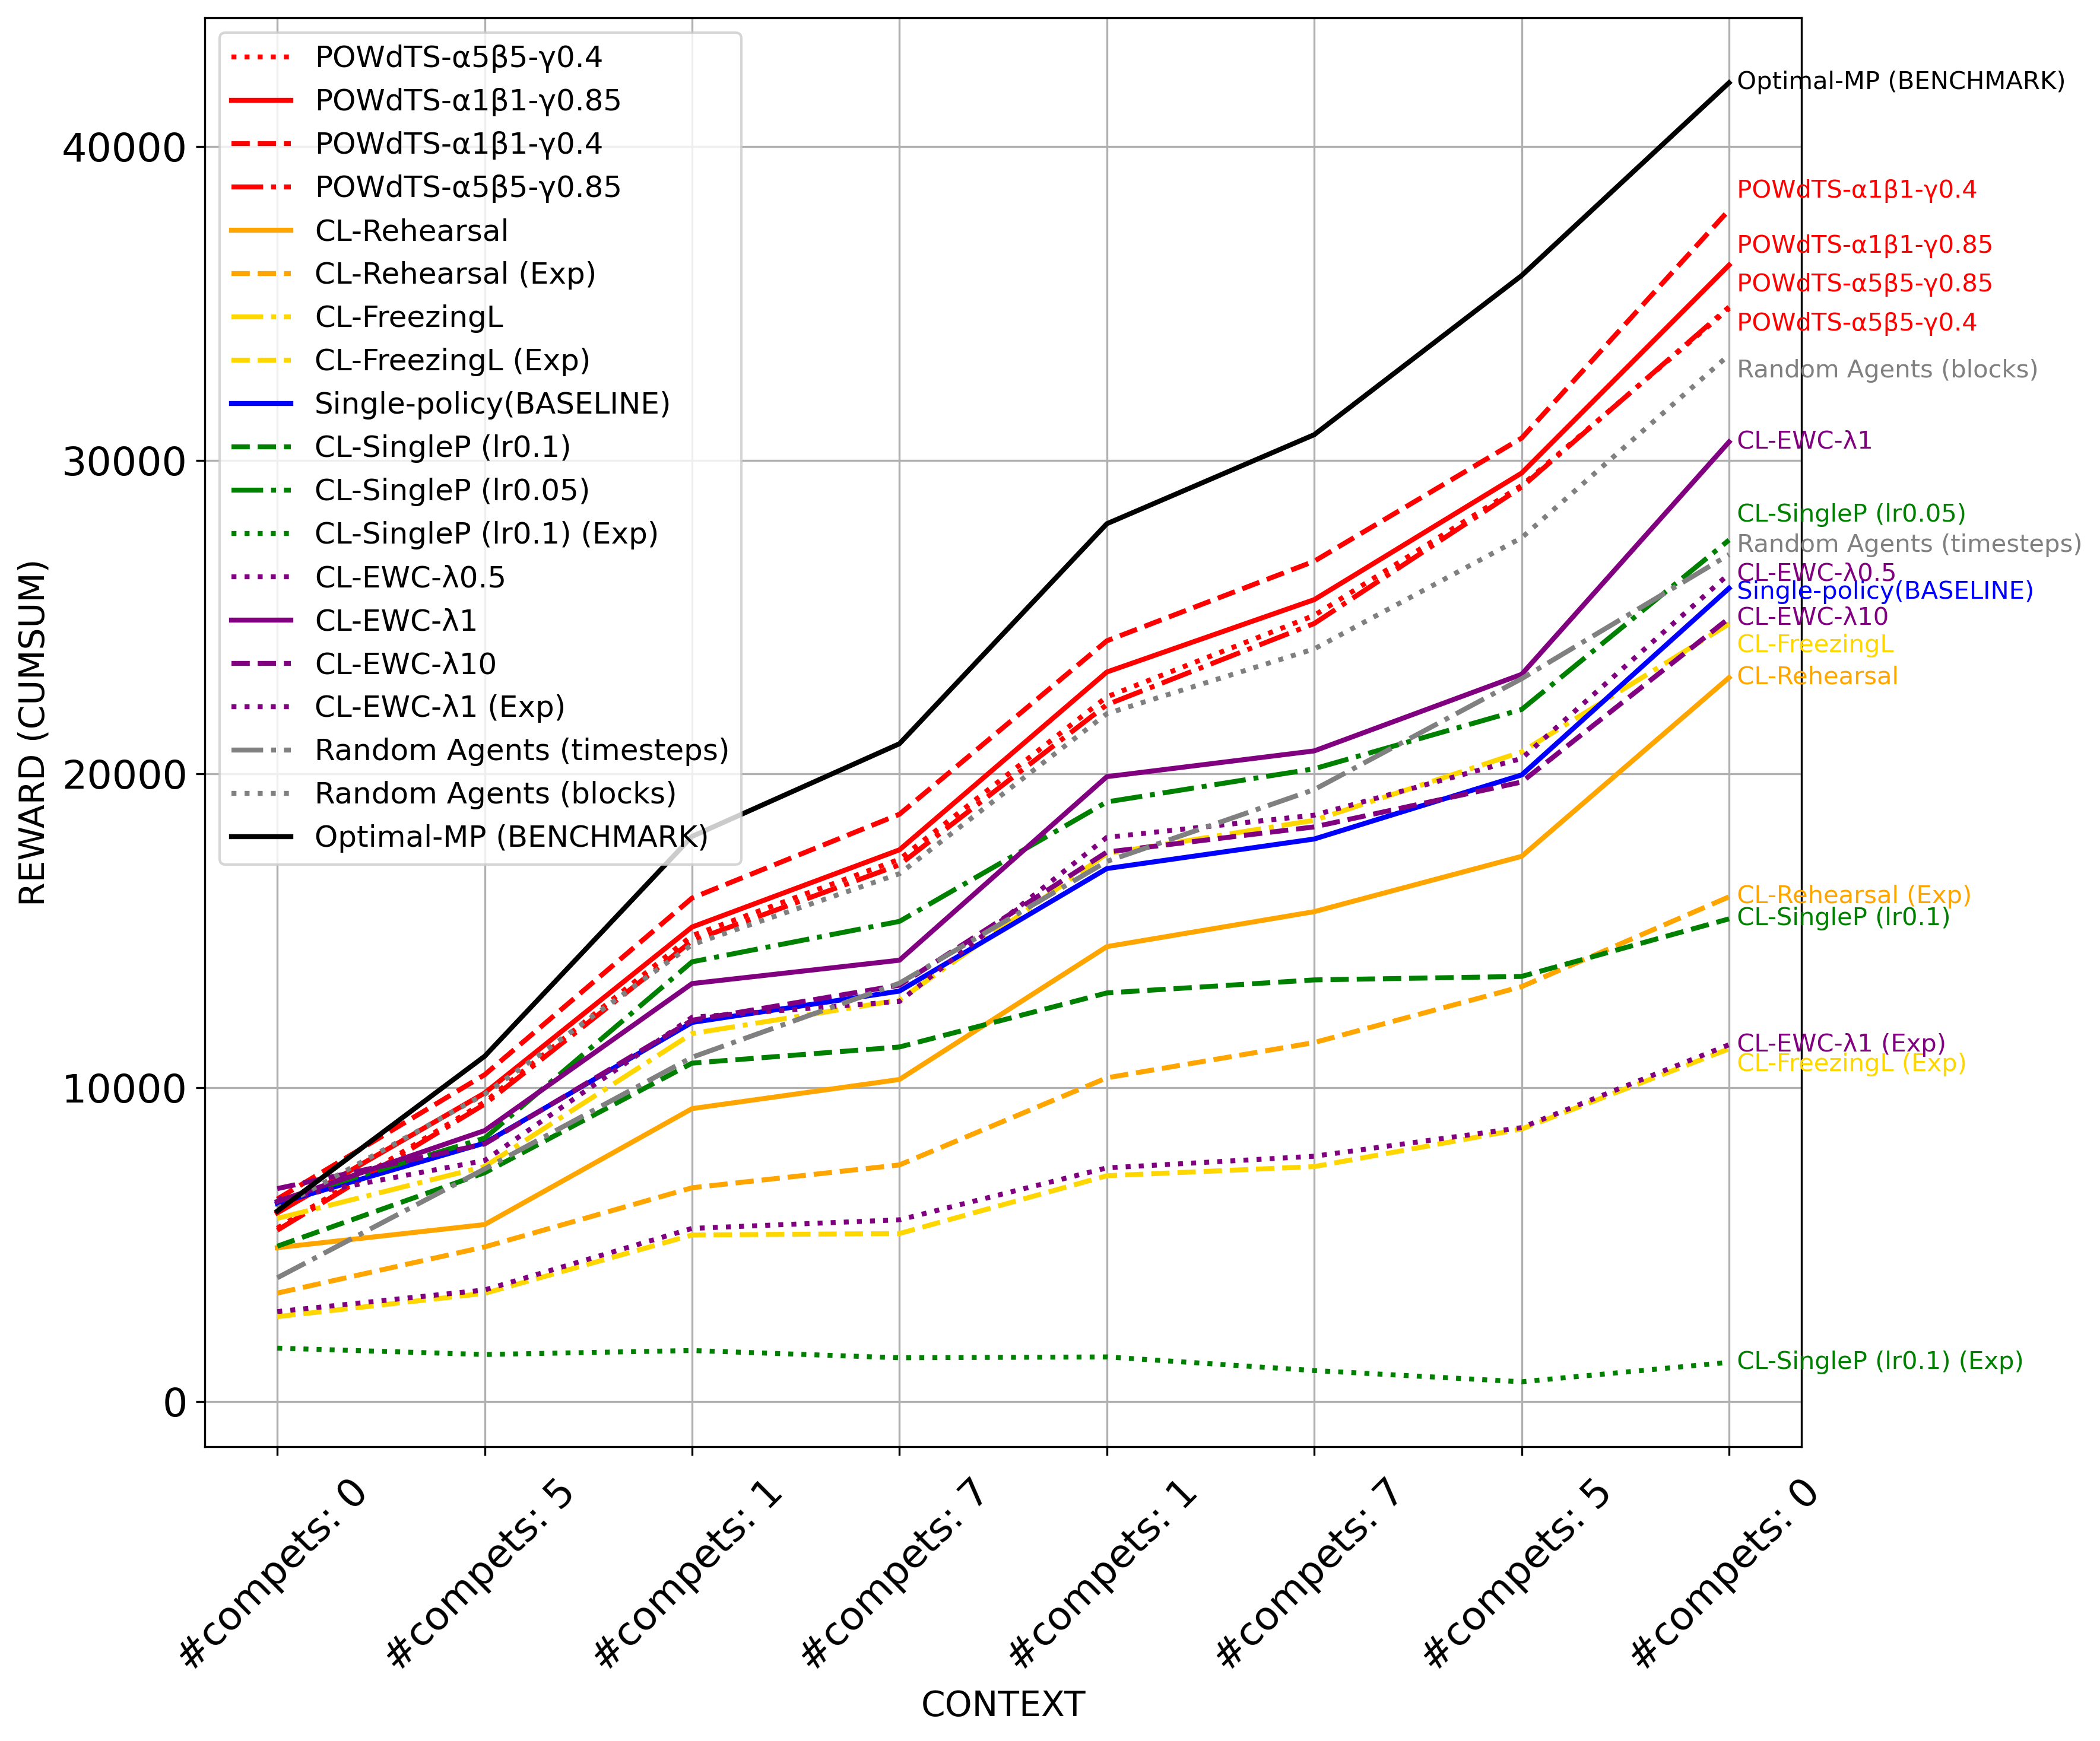

In [28]:
# Let's plot:

mean_values = {}
labels = subcaptions

metric = "reward"
dict_df = {}

for e in data.keys(): #experiments
    dict_df[e] =  {}
    for r in data[e]: # rounds
        dict_df[e][r] = []
        for d in data[e][r][0]:                 
            dict_df[e][r].append(d[metric].mean())       


for strategy, experiments in dict_df.items():
    # Initialize the list to hold mean values for this strategy
    mean_values[strategy] = []    
    # Calculate the number of rounds and number of values in each round
    num_rounds = len(experiments)
    num_values = len(experiments[list(experiments.keys())[0]])
    
    # Iterate over each position
    for i in range(num_values):
        # Collect values from the same position in each round
        values = [experiments[round][i] for round in experiments]        
        # Calculate the mean for this position
        mean_value = sum(values) / num_rounds        
        # Append the mean value to the list for this strategy
        mean_values[strategy].append(mean_value)

plt.figure(figsize=(12, 10))  

for e in mean_values:
    if("comp" not in e):
        line_style = strategies[e]["linestyle"]
        color = strategies[e]["color"]
        # Calculate the cumulative sum
        cum_sum = pd.DataFrame(mean_values[e]).cumsum()

        # Plot the line
        plt.plot(cum_sum, label=strategies[e]["name"], color=color, linestyle=line_style, linewidth=2)
        # Get the last point coordinates
        last_point_x = cum_sum.index[-1]
        last_point_y = cum_sum.iloc[-1, 0]
        
        # Some adjustments:
        if "α1β1" in strategies[e]["name"]:
            last_point_y += 600
        if "5-γ0.85" in strategies[e]["name"]:
            last_point_y += 700
        if "5-γ0.4" in strategies[e]["name"]:
            last_point_y -= 500
        if ".05" in strategies[e]["name"]:
            last_point_y += 800
        if "timesteps" in strategies[e]["name"]:
            last_point_y += 300
        if ":1(Exp)" in strategies[e]["name"]:
            last_point_y += 300
        if "blocks" in strategies[e]["name"]:
            last_point_y -= 500
        if strategies[e]["name"] == "CL-FreezingL":
            last_point_y -= 700
        if strategies[e]["name"] == "CL-FreezingL (Exp)":
            last_point_y -= 500
        if  "BASELINE" in  strategies[e]["name"]:
            last_point_y -= 120
        if strategies[e]["name"] == "CL-Rehearsal":
            last_point_y -= 0#700
        if strategies[e]["name"] == "CL-Rehearsal(Exp)":
            last_point_y += 500
        if strategies[e]["name"] == "CL-EWC:0.5":
            last_point_y += 200

        # Add the strategy name as text at the end of the line
        plt.text(last_point_x, last_point_y, f' {strategies[e]["name"]}', color=color, verticalalignment='center', fontsize=10)

# Set the x-axis labels
plt.xticks(range(len(labels)), [x.replace("#","") for x in labels])

# Set the x-axis labels with a larger font size
plt.xticks(range(len(labels)), labels, fontsize=16,rotation=45)
plt.yticks(fontsize=16)

# Set label and title with a larger font size
plt.xlabel('CONTEXT', fontsize=14)
plt.ylabel('REWARD (CUMSUM)', fontsize=14)
# Set legend with a larger font size
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
